In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('mushrooms.csv')

In [6]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

<AxesSubplot:xlabel='class', ylabel='count'>

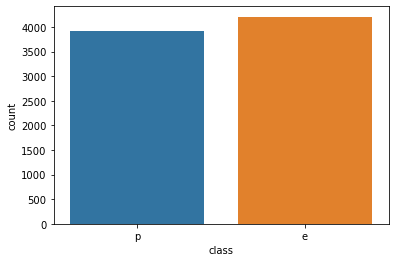

In [7]:
sns.countplot(x='class',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

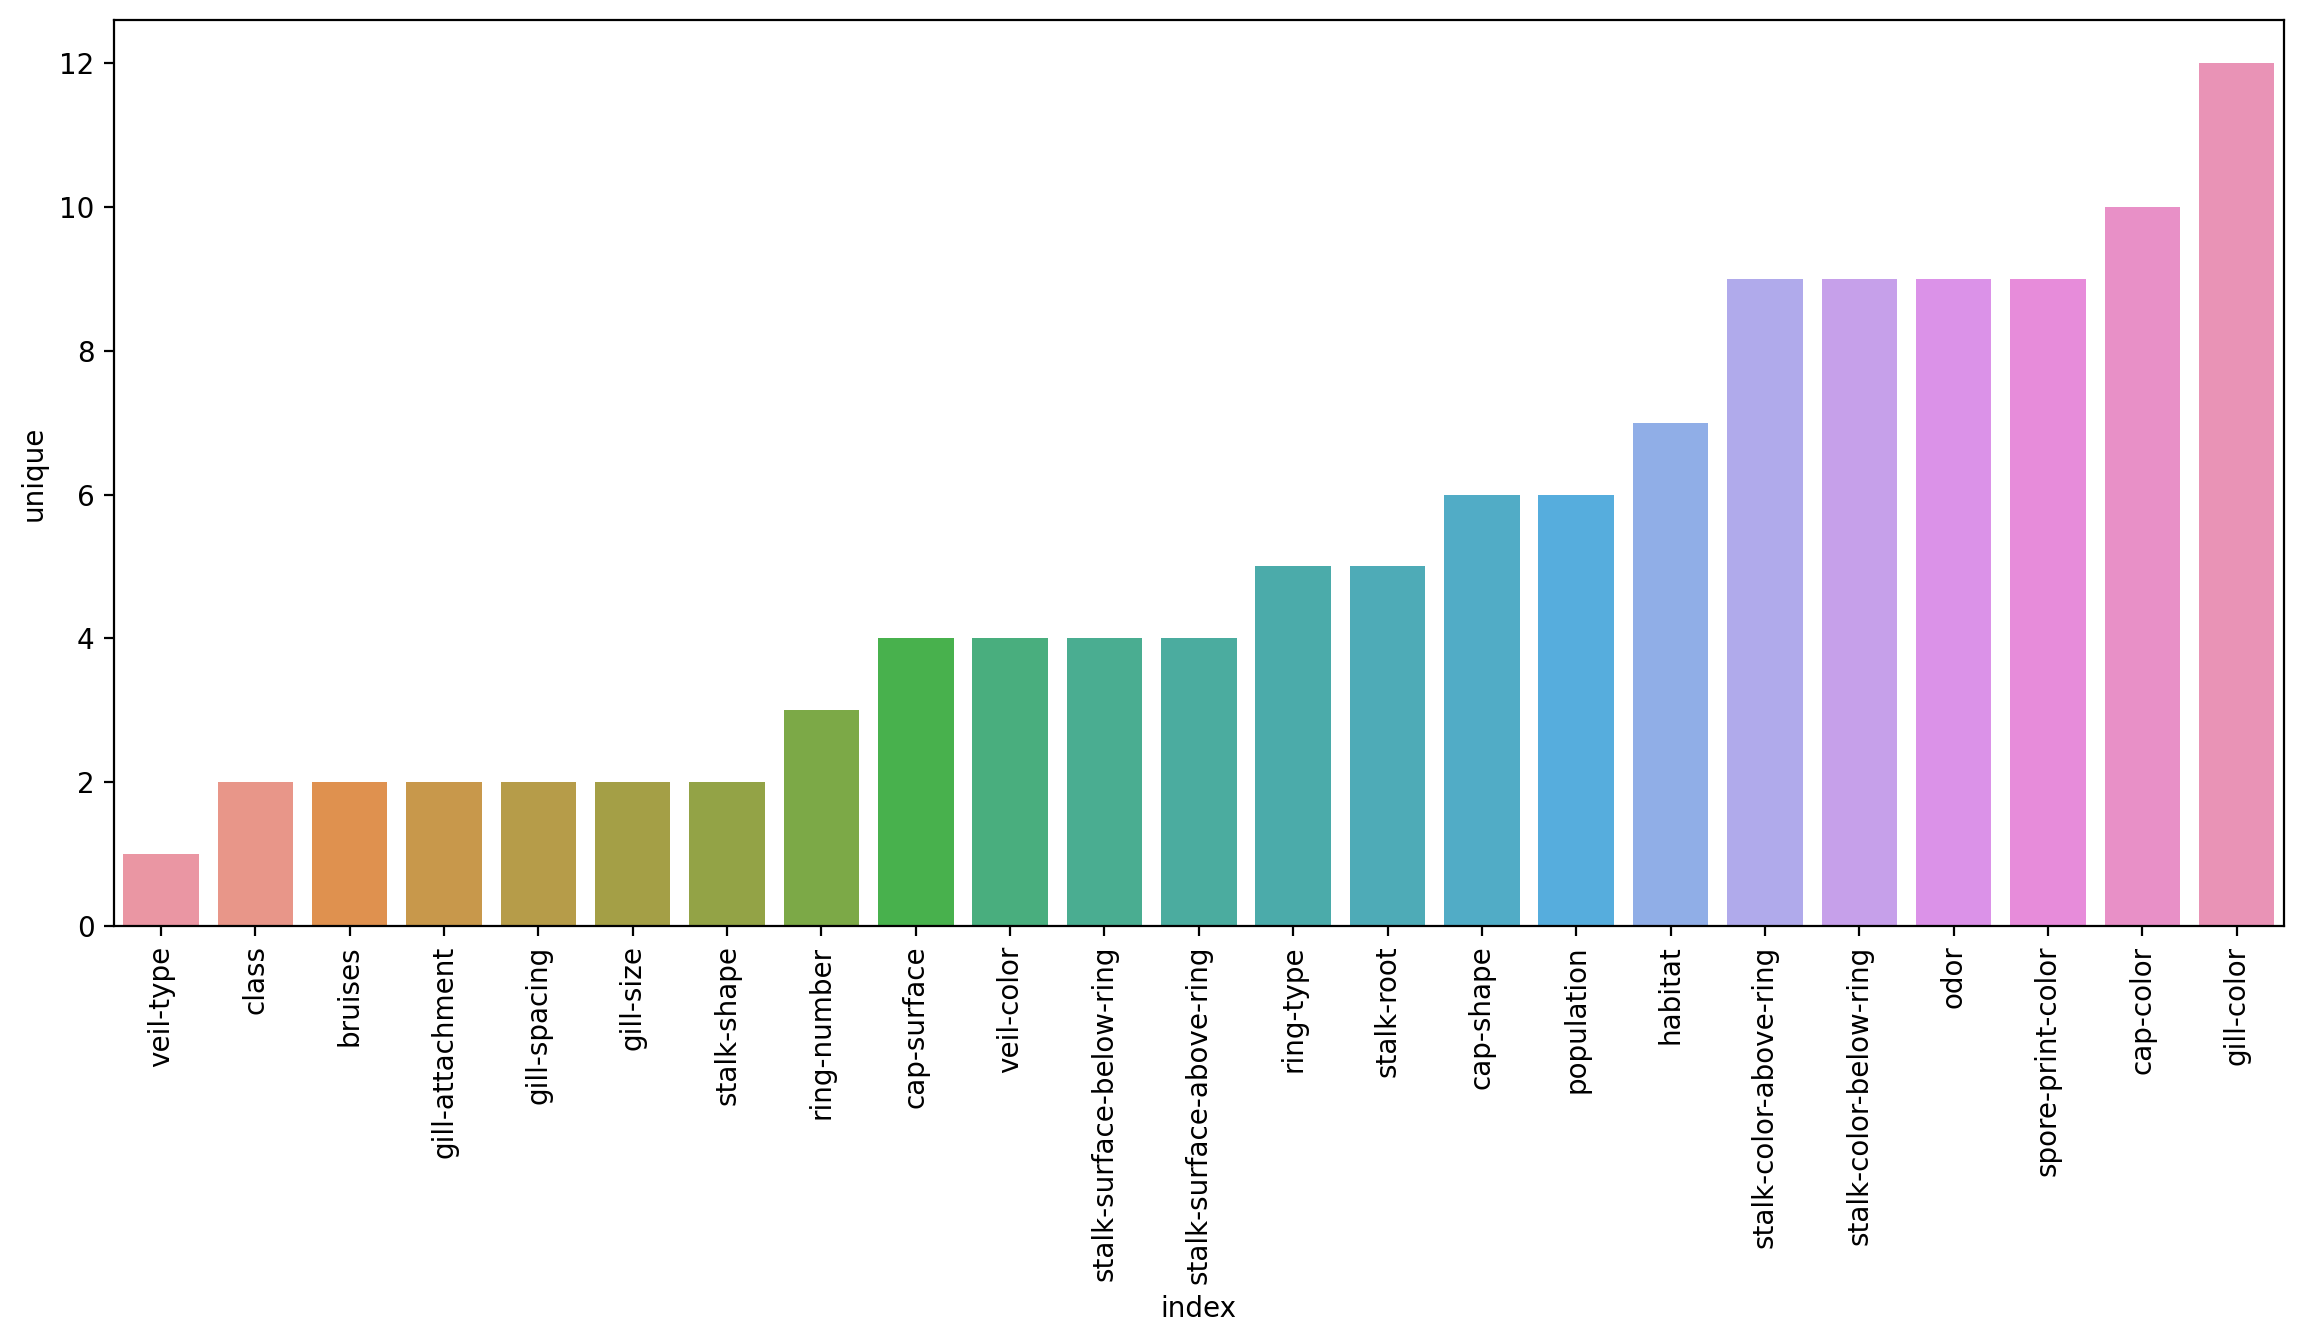

In [14]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90)

In [23]:
x = df.drop('class',axis=1)
x = pd.get_dummies(x,drop_first=True)
y = df['class']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15, random_state=101)

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=1)
model.fit(x_train,y_train)

from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

predictions = model.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [24]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
model.feature_importances_.argmax()

22

In [26]:
x.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

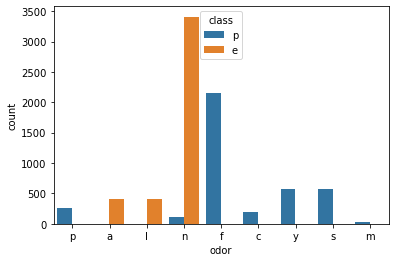

In [29]:
sns.countplot(data=df,x='odor',hue='class')

In [30]:
len(x.columns)

95

In [31]:
error_rates = []
for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

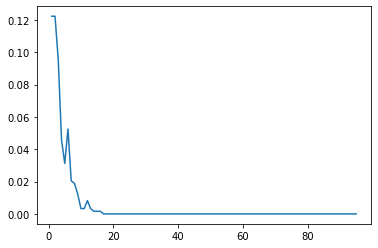

In [32]:
plt.plot(range(1,96),error_rates)

In [39]:
feats = pd.DataFrame(index=x.columns, data=model.feature_importances_,columns=['Importance'])
important_feats = feats[feats['Importance']>0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'cap-color_c'),
  Text(1, 0, 'cap-color_n'),
  Text(2, 0, 'cap-color_w'),
  Text(3, 0, 'bruises_t'),
  Text(4, 0, 'odor_c'),
  Text(5, 0, 'odor_f'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_p'),
  Text(8, 0, 'gill-spacing_w'),
  Text(9, 0, 'gill-size_n'),
  Text(10, 0, 'stalk-shape_t'),
  Text(11, 0, 'stalk-root_b'),
  Text(12, 0, 'stalk-surface-above-ring_k'),
  Text(13, 0, 'stalk-surface-below-ring_y'),
  Text(14, 0, 'stalk-color-below-ring_n'),
  Text(15, 0, 'stalk-color-below-ring_w'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'spore-print-color_w'),
  Text(19, 0, 'population_c'),
  Text(20, 0, 'population_v'),
  Text(21, 0, 'habitat_w')])

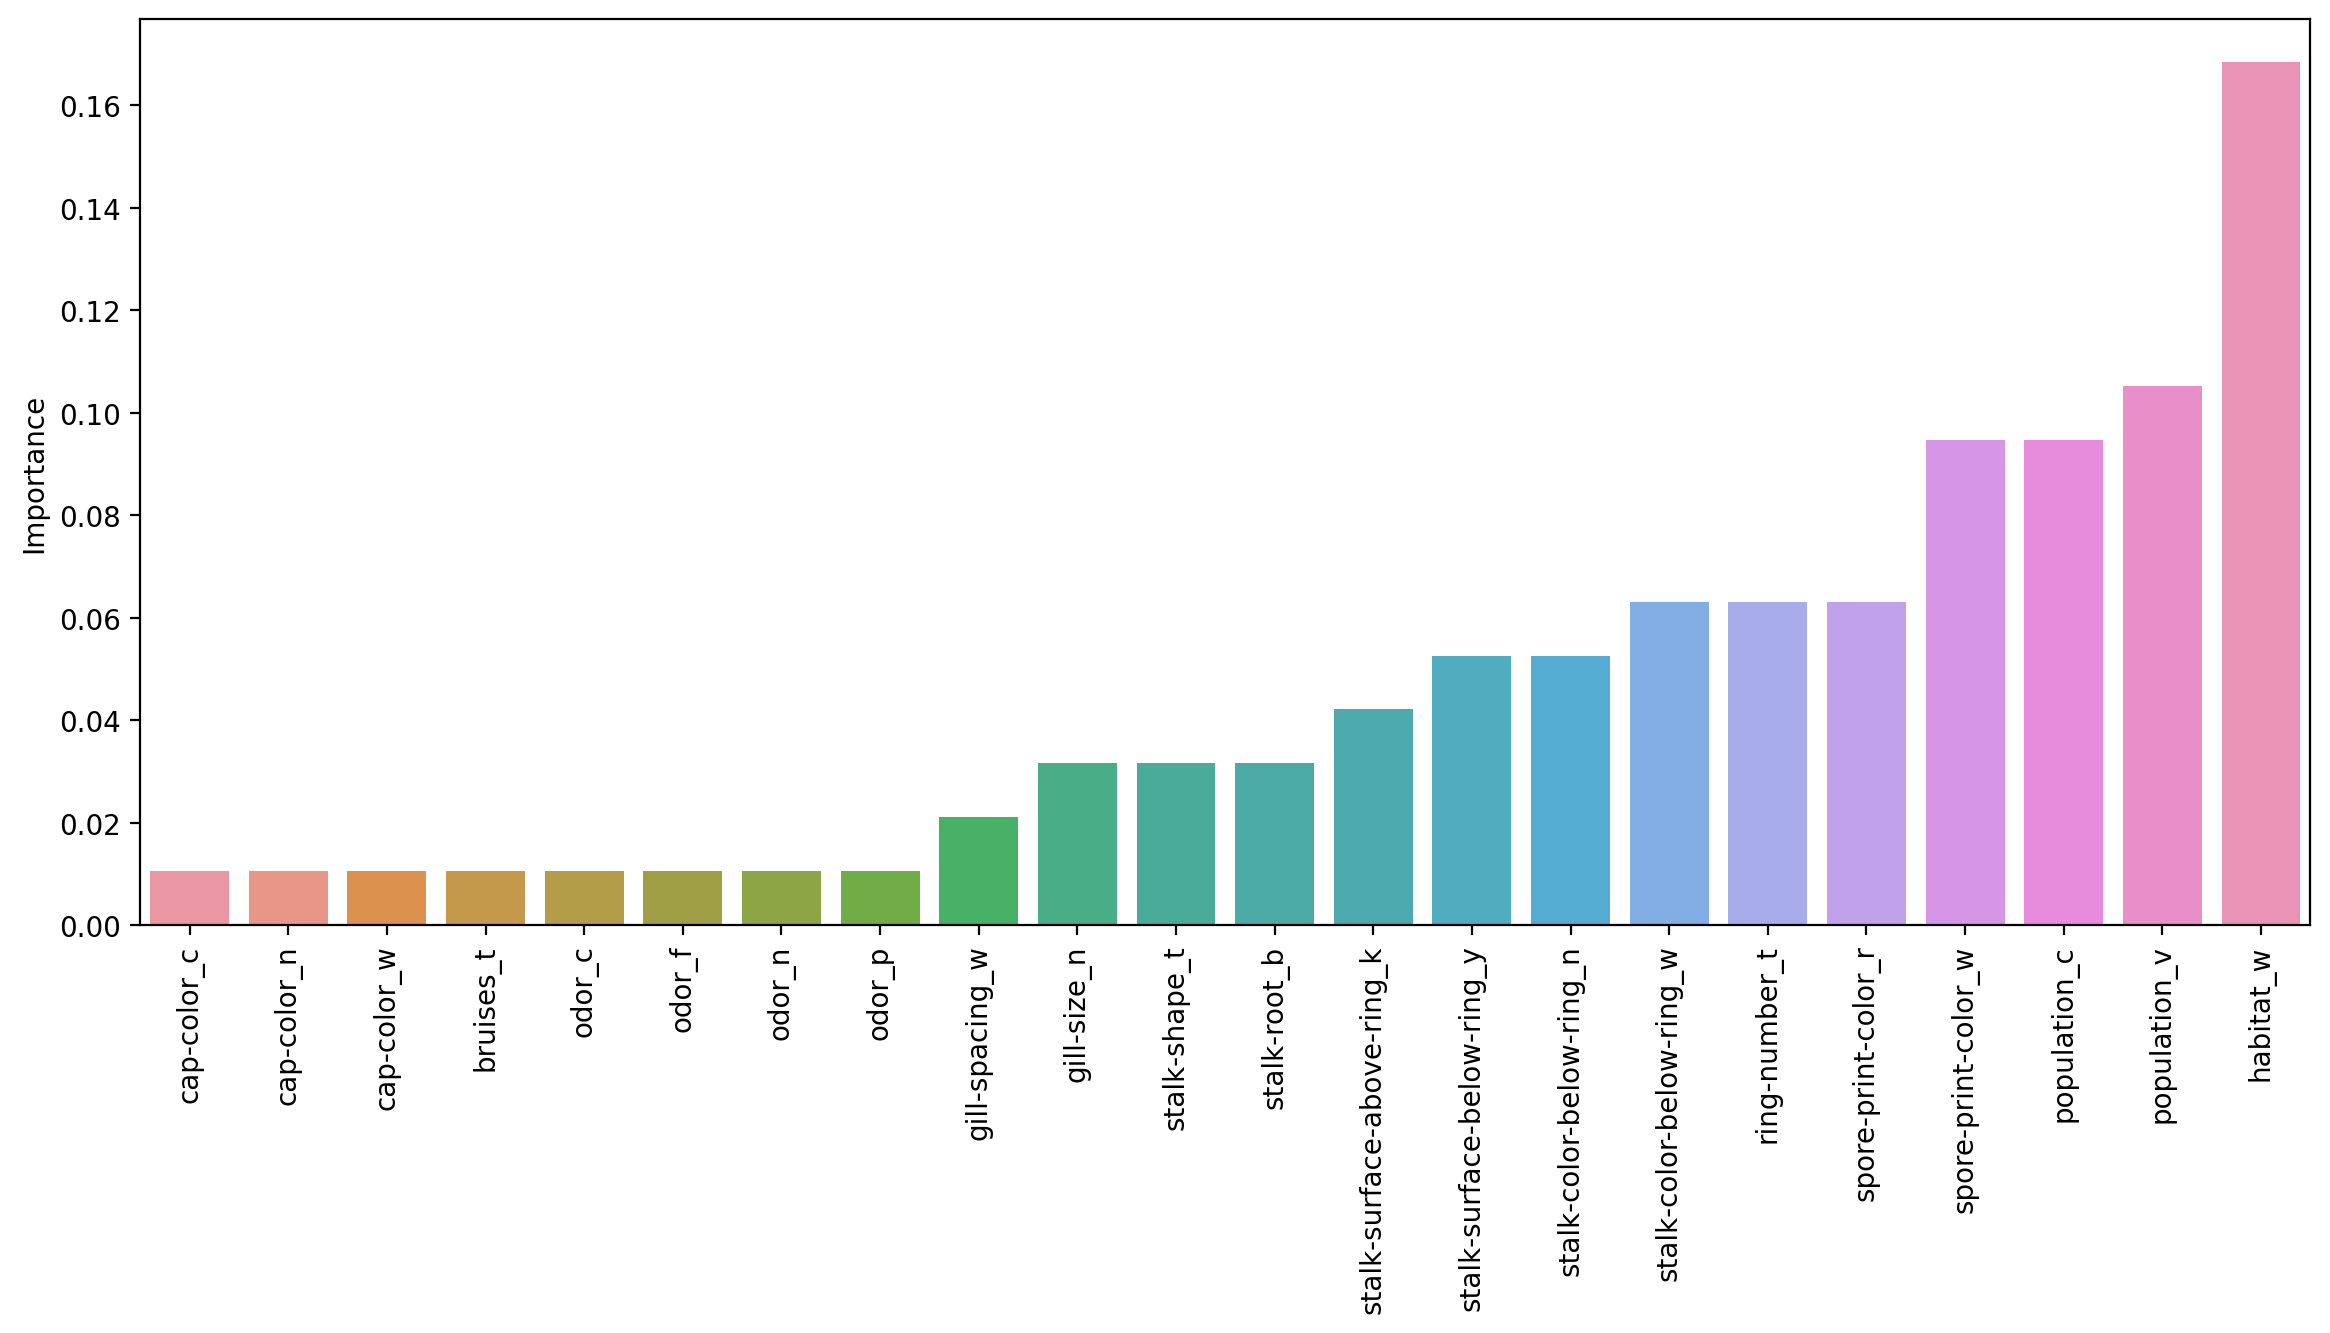

In [43]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=important_feats.sort_values('Importance'),x=important_feats.index,y='Importance')
plt.xticks(rotation=90)